# Bank Demo

Datasource from Kaggle : https://www.kaggle.com/lovelesh/bank-dataset

### Business Scenario
Given historic information of Customers Exiting the bank and their information -
1. We want to identify the factors that have impact on Customers Exiting the Bank

2. Build a Prediction Model to identify Customer who have higher probability of Exiting and use this data to plan for future Actions.


## Data Analysis and Preparation

In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Importing Dataset
bank_data = pd.read_csv('C:/AI_DAS/Bank_Demo/Bank_Data.csv')
bank_data.shape

(10000, 14)

In [3]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Checking data schema
data = bank_data.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# Check for Null Values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Since all columns are non-null, there is no missing data values. If data has missing information, then we need to replace non-null values.

In [6]:
# Get unique count for each variable
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [7]:
# checking Statistical information of dataset
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Data Exploration

###### We are analysing on Factors that affect Exiting of Customer

### 1. Percentage of Bank Customers who Exited Vs Continued

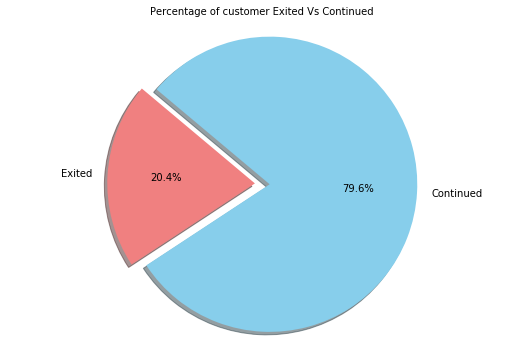

In [8]:
status = 'Exited', 'Continued'
count_exit = data.Exited[data['Exited']==1].count()
count_cont = data.Exited[data['Exited']==0].count()
sizes = (count_exit, count_cont)
explode = (0, 0.1)
colors = ['lightcoral', 'skyblue', 'yellowgreen']
fig1, ax1 = plt.subplots(figsize=(9,6))
ax1.pie(sizes, explode=explode, labels=status, autopct='%1.1f%%',colors=colors, shadow=True, startangle=140)
ax1.axis('equal')
plt.title("Percentage of customer Exited Vs Continued", size = 10)
plt.show()

### 2. Ratio of Customers Exited Vs Continued by Factors - Geography, Gender, HasCrCard, IsActiveMember

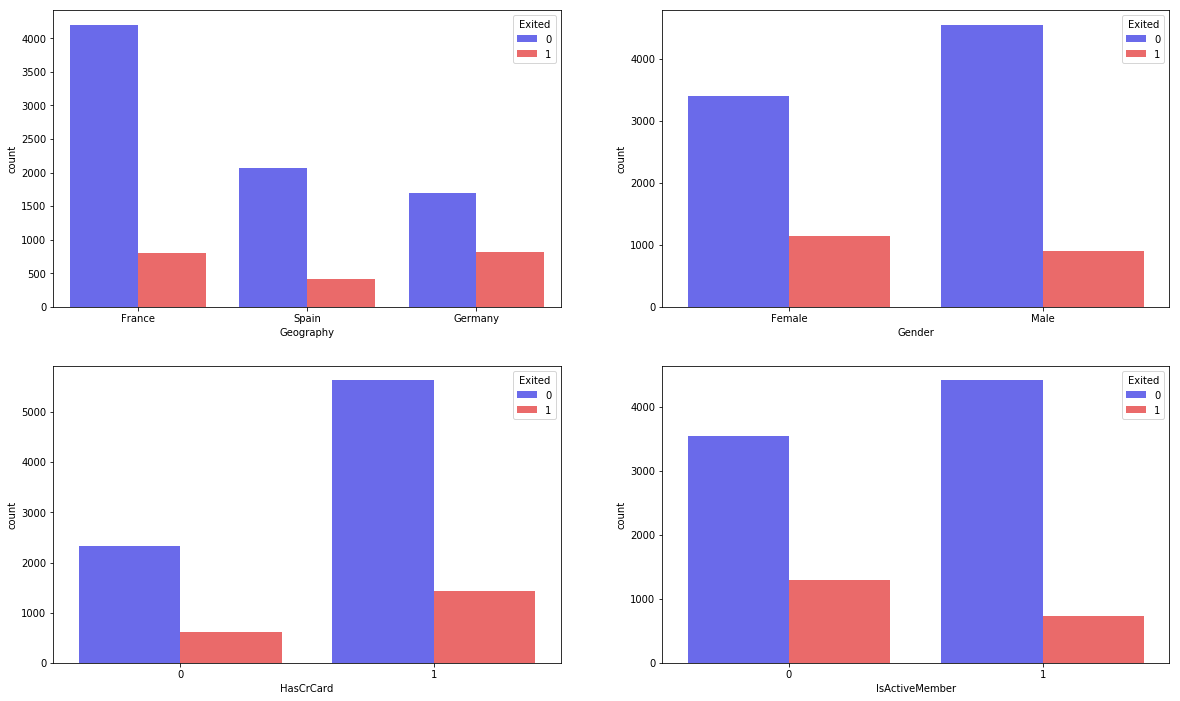

In [9]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = data, ax=axarr[0][0], palette = "seismic")
sns.countplot(x='Gender', hue = 'Exited',data = data, ax=axarr[0][1], palette = "seismic")
sns.countplot(x='HasCrCard', hue = 'Exited',data = data, ax=axarr[1][0], palette = "seismic")
sns.countplot(x='IsActiveMember', hue = 'Exited',data = data, ax=axarr[1][1], palette = "seismic")

### 3. Trend of Customers exiting by Age Factor

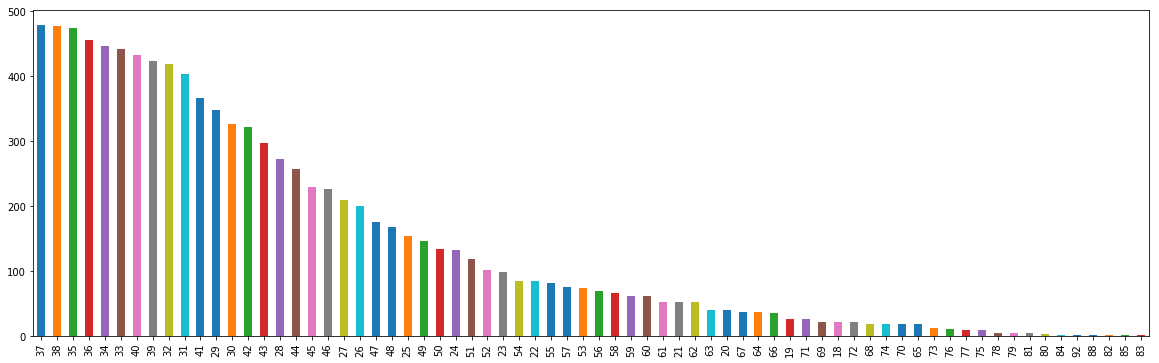

In [10]:
data["Age"].value_counts().plot.bar(figsize=(20,6), x= "Age")

## Data Preprocessing (Feature Engineering)

###### Machine Learning Algorithm cannot use text data in data processing so non-numeric column values are either dropped if not significant or converted to Integer value.
###### Categorical features - Surname, Geography, Gender
###### Columns Not Relevant for Predcition - RowNumber, Surname, CustomerID
###### Columns converted to Numeric Features - Geography, Gender

In [11]:
# Deleting Surname feature as its irrelevant for analysis
data = data.drop("Surname", axis=1)
data = data.drop("RowNumber", axis = 1)
data = data.drop("CustomerId", axis = 1)

In [12]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
print(data["Geography"].unique())
print(data["Gender"].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']


In [14]:
# Mapping Gender to Integer
gender = {'Male': 1,'Female': 2} 
data.Gender = [gender[item] for item in data.Gender] 

In [15]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,2,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,2,41,1,83807.86,1,0,1,112542.58,0
2,502,France,2,42,8,159660.80,3,1,0,113931.57,1
3,699,France,2,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,2,43,2,125510.82,1,1,1,79084.10,0


In [16]:
# Mapping Geography to Integer
geography = {'France': 1,'Spain': 2,'Germany':3 } 
data.Geography = [geography[item] for item in data.Geography] 
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,2,42,2,0.00,1,1,1,101348.88,1
1,608,2,2,41,1,83807.86,1,0,1,112542.58,0
2,502,1,2,42,8,159660.80,3,1,0,113931.57,1
3,699,1,2,39,1,0.00,2,0,0,93826.63,0
4,850,2,2,43,2,125510.82,1,1,1,79084.10,0


In [17]:
# Creating Pivot table for Data Analysis
pivot = data.pivot_table("Exited", index = "Gender", columns = "Geography")
pivot

Geography,1,2,3
Gender,,,
1,0.127134,0.131124,0.278116
2,0.203450,0.212121,0.375524


###### From above table, we can detect 
1. More females have exited bank as compared to Males
2. Higher rate of customers leaving in Germany

# Build Machine Learning Model

### Steps for Preparing Data
1. Random Shuffling of Data to avoid any Bias in Dataset
2. Split Dataset into a-Features b-Target
3. Split Data into Train and Test dataset

In [18]:
# 1.Shuffling dataset
data = data.reindex(np.random.permutation(data.index))

In [23]:
# 2.Split Dataset into a-Features b-Target
feature = data.drop("Exited", axis=1)
target = data["Exited"]

In [24]:
feature.head()
#target.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8516,500,1,2,34,4,0.0,2,1,0,12833.96
8202,589,2,2,27,4,0.0,2,1,0,144181.48
9668,720,2,1,34,3,0.0,2,1,1,77047.78
4957,752,1,1,39,3,0.0,1,1,0,188187.05
6160,632,1,2,21,1,0.0,2,1,0,84008.66


In [25]:
# Importing Machine Learning Libraries for Test/Train Split of Data
from sklearn.model_selection import train_test_split

In [26]:
# Splitting Features from 
X_train, X_test, y_train, y_test = train_test_split(feature,target, test_size = 0.2, random_state=0)

###### This is "Supervised" - "Classification" Problem - since data is labelled and can be classified into two distict classes - Exited (0/1)

## Predicting with Logistic Regression

In [27]:
# Import Library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [28]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print("Logistic Regression : {}%".format(accuracy_score(pred,y_test)*100))

Logistic Regression : 80.55%


## Predicting with Decision Tree 

Most Machine Learning Algorithms are classified into 2 categories:
1. Distance Based - KNN, SVM - work efficiently with feature scaling
2. Density Based - Naive Bayes, Decision Tree, Random Forest ensemble methods - are not much affected by Feature Scaling

In [29]:
# Import Library
from sklearn import tree

In [30]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)
print("Decision Tree : {}%".format(accuracy_score(pred,y_test)*100))

Decision Tree : 78.95%


## Predicting with Gaussian Naive Bayes Model

In [31]:
# Import Library
from sklearn.naive_bayes import GaussianNB

In [32]:
clf = GaussianNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print("Gaussian Naive Bayes : {}%".format(accuracy_score(pred,y_test)*100))

Gaussian Naive Bayes : 80.75%


## Predicting with Random Forest Model

In [33]:
# Import Library
from sklearn.ensemble import RandomForestClassifier

In [34]:
clf = RandomForestClassifier(n_estimators = 200, random_state=200)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print("Random Forest Model : {:.2f}%".format(accuracy_score(pred,y_test)*100))

Random Forest Model : 87.05%


In [35]:
confusion_matrix(y_test, pred)

array([[1551,   72],
       [ 187,  190]], dtype=int64)

## Feature Scaling (Normalization)

###### Some algorithm need Feature Scaling for better accuracy - For e.g. SVM, K-Nearest Neighbour, K-Means Clustering

In [36]:
# Import Preprocessing Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [37]:
#Feature Scaling using sklearn Preprocessing Module
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
#X_train
X_test

array([[-1.11172518, -0.89555975, -0.91324755, ...,  0.64842466,
        -1.03097965, -0.2520836 ],
       [-0.53090211,  0.30794739, -0.91324755, ...,  0.64842466,
        -1.03097965,  0.19314186],
       [-2.08667819, -0.89555975,  1.09499335, ..., -1.5421992 ,
        -1.03097965,  1.30660683],
       ...,
       [ 0.56851299,  1.51145453,  1.09499335, ...,  0.64842466,
         0.96995125, -0.01778769],
       [-1.0391223 ,  1.51145453,  1.09499335, ..., -1.5421992 ,
        -1.03097965, -0.0499569 ],
       [ 2.07242988,  1.51145453,  1.09499335, ...,  0.64842466,
        -1.03097965,  0.1954521 ]])

## Predicting with Support Vector Machine

In [39]:
# Import Library
from sklearn.svm import SVC  #Support Vector Classification module  

In [40]:
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)  #Train data

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [41]:
#Making Prediction
y_pred = svclassifier.predict(X_test)

In [43]:
print("Support Vector Classifier : {:.2f}%".format(accuracy_score(pred,y_test)*100))

Support Vector Classifier : 87.05%


## Predicting with K-Nearest Neighbors

In [44]:
# Import Library
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knnclassifier = KNeighborsClassifier()
knnclassifier.fit(X_train, y_train)  #Train data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [46]:
#Making Prediction
y_pred = knnclassifier.predict(X_test)

In [47]:
print("K-Nearest Neighbour Classifier : {:.2f}%".format(accuracy_score(pred,y_test)*100))

K-Nearest Neighbour Classifier : 87.05%


## Evaluating Model

#1 Accuracy Score
#2 Confusion Matrix
#3 Classification Report
#4 Area under Curve    

In [48]:
from sklearn.metrics import classification_report
classification_report(y_test, y_pred)

'             precision    recall  f1-score   support\n\n          0       0.87      0.94      0.90      1623\n          1       0.59      0.38      0.47       377\n\navg / total       0.82      0.83      0.82      2000\n'

Precision: This a measure of a classifier's exactness, i.e., the ability of a classifier to give correct labels.

Recall: A measure of a classifiers completeness, i.e., the ability of a classifier to find all samples that belong a certain class.

F1 Score (or F-score): A weighted average of precision and recall.

## Testing Model
Select the best algorithm and test with New Data

In [49]:
#Random Forest Classifier - Accuracy Score = 87%
model = RandomForestClassifier(n_estimators = 200, random_state=200)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("Random Forest Model : {:.2f}%".format(accuracy_score(pred,y_test)*100))

Random Forest Model : 86.95%


Get Input values of All Features from user and predict if Customer will exit or not

In [50]:
print("Enter Credit Score :")
CreditScore = int(input())
print("Enter Geography ('France': 1,'Spain': 2,'Germany':3 ) :")
Geography = int(input())
print("Enter Gender ('Male': 1,'Female': 2) :")
Gender = int(input())
print("Enter Age :")
Age = int(input())
print("Enter Tenure :")
Tenure = int(input())
print("Enter Current Balance :")
Balance = float(input())
print("Enter Number of Products :")
NumOfProducts = int(input())
print("Has Credit Card ? ('Yes': 1,'No': 0) :")
HasCrCard = int(input())
print("Is Active Member ? ('Yes': 1,'No': 0) :")
IsActiveMember = int(input())
print("Enter Estimated Salary :")
EstimatedSalary = float(input())

Enter Credit Score :
619
Enter Geography ('France': 1,'Spain': 2,'Germany':3 ) :
1
Enter Gender ('Male': 1,'Female': 2) :
2
Enter Age :
42
Enter Tenure :
2
Enter Current Balance :
0
Enter Number of Products :
1
Has Credit Card ? ('Yes': 1,'No': 0) :
1
Is Active Member ? ('Yes': 1,'No': 0) :
1
Enter Estimated Salary :
101348


In [51]:
X_user = np.array([CreditScore,Geography,Gender,Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary])

In [52]:
X_user

array([6.19000e+02, 1.00000e+00, 2.00000e+00, 4.20000e+01, 2.00000e+00,
       0.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.01348e+05])

In [53]:
y_pred = model.predict([X_user])

In [54]:
index = y_pred

In [55]:
if index == 1:
    print("Customer will not exit the Bank")
else:
    print("Customer might soon exit the Bank, Please take Action !!")

Customer might soon exit the Bank, Please take Action !!


## Derived Conclusion

We have accuracy of maximum 90% with 1000 rows. This accuracy can be impoved by collection more data and retraining Algorithm iteratively. Algorithm will continue learning from newer Data and better domain knowledge and get optimized to increase Accuracy Score.

Credit Score, Product, Credit Card or Salary has lower impact.
Age is important factor - older customers are exiting more than younger ones. 
Females exit ratio is more than Males. 
Germany is least performing Country. 
Customers with low Tenure or high Tenure and leaving more than ones in mid.